In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly&response_type=code

Enter your authorization code:



ValueError: ignored

In [1]:
import glob
import xml.etree.ElementTree as ET
import pandas as pd 

df_cols= ["id","text_list","condition"]
rows = []

In [2]:

filenames = glob.glob("reddit-training-ready-to-share/positive_examples_anonymous/train_subject[0-9]*.xml")  # change the pattern to match your case
for filename in filenames:
    with open(filename, 'r', encoding="utf-8") as content:
        tree = ET.parse(content)
        o_id = tree.find('ID').text
        lst_jugador = tree.findall('WRITING/TEXT')
        o_txtlst = ""
        for comment in lst_jugador:
          o_txtlst += comment.text
    rows.append({"id":o_id, "text_list":o_txtlst, "condition": 1})


In [3]:
pos_df = pd.DataFrame(rows,columns= df_cols)

In [4]:
len(pos_df)

83

In [5]:
pos_df.sample(20)

,id,text_list,condition
63,train_subject7925,so what do you do when you find out your bf c...,1
8,train_subject1457,"Washington it is. Born and raised. Now, I mus...",1
13,train_subject1839,That's such an incredibly kind thing to say! ...,1
21,train_subject2440,Not really dire at all. I'm well nourished an...,1
76,train_subject933,I try to buy swim shorts that reach mid thigh...,1
45,train_subject6146,My DM uses fudge dice for both 1s and 20s. It...,1
71,train_subject888,I think it may actually be sadder to have rec...,1
59,train_subject7515,instructions unclear. dick caught in ceiling ...,1
72,train_subject8901,I personally would've preferred Ron Perlman (...,1
0,train_subject1095,I believe we get it next week. **Dark Horse*...,1


Negative dataset

In [6]:
df_cols= ["id","text_list","condition"]
rows = []

In [7]:
filenames = glob.glob("reddit-training-ready-to-share/negative_examples_anonymous/train_subject[0-9]*.xml")  # change the pattern to match your case
for filename in filenames:
    with open(filename, 'r', encoding="utf-8") as content:
        tree = ET.parse(content)
        o_id = tree.find('ID').text
        lst_jugador = tree.findall('WRITING/TEXT')
        o_txtlst = ""
        for comment in lst_jugador:
          o_txtlst += comment.text
    rows.append({"id":o_id, "text_list":o_txtlst, "condition": 0})

In [8]:
neg_df = pd.DataFrame(rows,columns= df_cols)

In [9]:
len(neg_df)

403

In [10]:
neg_df.sample(20)

,id,text_list,condition
319,train_subject8318,The raptor is running in slow motion at fir...,0
185,train_subject529,"Why exactly, though? Yes, of course there ar...",0
317,train_subject8267,http://www.uvm.edu/~cdanfort/cs...,0
64,train_subject2597,Hint- the bride is usually the only one in a ...,0
38,train_subject1905,Not a really long video but a good reminder t...,0
347,train_subject898,"Even if I stopped sinning, I doubt there woul...",0
87,train_subject3392,"I run a bar in Cambodia, and each night we sc...",0
220,train_subject6114,This is definitely the approach you should ta...,0
127,train_subject4233,autobot manboobs solve nothing /r/pimp ha...,0
81,train_subject3236,your welcome [Looks Legit AF](http://i.img...,0


In [11]:
Combined_df = pd.concat([neg_df,pos_df])

In [12]:
len(Combined_df)

486

In [13]:
len(pos_df)

83

In [14]:
len(neg_df)

403

In [15]:
Combined_df = Combined_df.sample(len(Combined_df))

In [16]:
Combined_df.sample(10)

,id,text_list,condition
71,train_subject888,I think it may actually be sadder to have rec...,1
125,train_subject4181,Sources claim it's a legit pantyshot. ...,0
113,train_subject3981,Another reason why government backd...,0
52,train_subject7135,But you're alright to stare at a naked Newman...,1
379,train_subject9546,May 2nd. Just me and The People's Champ The R...,0
144,train_subject4487,Gold. Working fine on this end.\n\nWha...,0
17,train_subject2219,I was told I might need an audio input device...,1
374,train_subject9456,I'm just here for the comments. Hop...,0
256,train_subject6972,I think more than 800 the author is overstret...,0
397,train_subject9915,Ohhhh.... yeeeeeah! That's the ticket! My fa...,0


In [17]:
Combined_df.to_csv("reddit-training-ready-to-share/Uscdata_dataset.csv",index=False)

In [18]:
import spacy
import torch
import torchtext
import seaborn as sns
from matplotlib import pyplot as plt
import re

In [19]:
Combined_df.drop(['id'], axis = 1,inplace=True)

In [20]:
tweets = Combined_df

In [21]:
tweets = tweets.rename(index = str, columns = {'text_list': 'SentimentText', 'condition': 'Sentiment'})

tweets.head()


,SentimentText,Sentiment
291,"I already try to talk to her, in my experienc...",0
128,"To read what happened before now, go here.\n\...",0
78,SpaceX's announcement of their plan for Mars....,1
117,I've been on the sea my entire life you see. ...,0
45,Giggidy There are more combinations a deck...,0


In [22]:
tweets=tweets.dropna()

In [23]:
tweets.shape

(486, 2)

In [24]:
tweets['Sentiment'].unique()

array([0, 1], dtype=int64)

In [25]:
tweets.Sentiment.value_counts()

0    403
1     83
Name: Sentiment, dtype: int64

[Text(0.5, 0, 'Labels')]

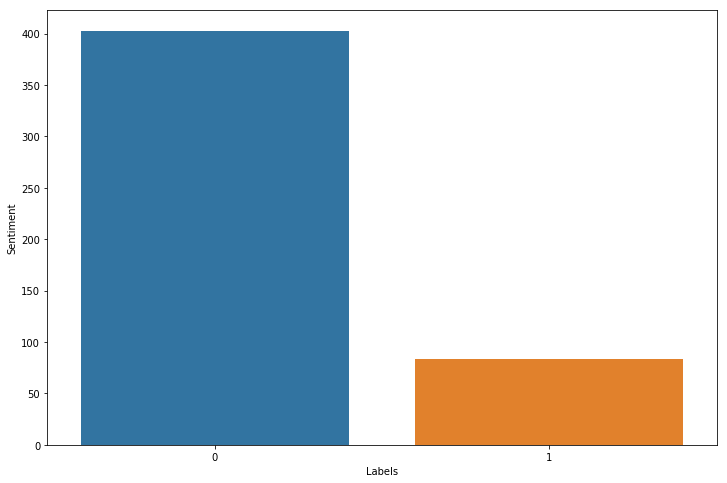

In [26]:
fig = plt.figure(figsize=(12, 8))

ax = sns.barplot(x=tweets.Sentiment.unique(), y=tweets.Sentiment.value_counts())

ax.set(xlabel='Labels')

In [27]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(tweets, test_size=0.2, random_state=42)

In [28]:
train.reset_index(drop=True), test.reset_index(drop=True)

(                                         SentimentText  Sentiment
 0             Sharks are even embarrassed for these...          0
 1     Dark Mysteries is the name of that channel, i...          0
 2     Guys you are going to make Manila sad again :...          0
 3     But hey, at least I learned that I had mod ma...          0
 4                   http://www.uvm.edu/~cdanfort/cs...          0
 5         Is she a grumpy big kid?  Yeah and I agre...          0
 6     I have decided just to get him a trim on his ...          1
 7     Ohio, USA. Grime all day.  It seems like most...          1
 8     Haha. Hey, I figure if you're going to have a...          0
 9       awesome film!  Would you wash your hands af...          0
 10    My girlfriend gets stinging in her eyes more ...          0
 11      I was being hyperbolic dude, you didn't hon...          0
 12                                                 ...          0
 13    As long as you aren't TOO afraid (   )    how...       

In [29]:
train.shape, test.shape

((388, 2), (98, 2))

In [36]:
train.to_csv('reddit-training-ready-to-share/train_tweets.csv', index=False)
test.to_csv('reddit-training-ready-to-share/test_tweets.csv', index=False)

In [37]:
def tweet_clean(text):
    
    text = re.sub(r'[^A-Za-z0-9]+', ' ', text) 
    text = re.sub(r'https?:/\/\S+', ' ', text) 
    
    return text.strip()

In [38]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'tagger', 'ner'])

def tokenizer(s): 
    return [w.text.lower() for w in nlp(tweet_clean(s))]

In [39]:
TEXT = torchtext.data.Field(tokenize = tokenizer)

LABEL = torchtext.data.LabelField(dtype = torch.float)

In [40]:
datafields = [('SentimentText', TEXT),('Sentiment', LABEL)]

In [41]:
trn, tst = torchtext.data.TabularDataset.splits(path = 'reddit-training-ready-to-share/', 
                                                train = 'train_tweets.csv',
                                                test = 'test_tweets.csv',    
                                                format = 'csv',
                                                skip_header = True,
                                                fields = datafields)

TO FIX CSV FILE LIMIT ERROR

In [42]:
import csv
import ctypes as ct
csv.field_size_limit(int(ct.c_ulong(-1).value // 2))

922337203

In [43]:
import csv
import ctypes as ct
csv.field_size_limit(int(ct.c_ulong(-1).value // 2))
limit1 = csv.field_size_limit()
limit1

2147483647

In [44]:
"0x{0:016X}".format(limit1)

'0x000000007FFFFFFF'

In [45]:
print(f'Number of training examples: {len(trn)}')
print(f'Number of testing examples: {len(tst)}')

Number of training examples: 388
Number of testing examples: 98


In [46]:
vars(trn.examples[0])

{'SentimentText': ['sharks',
  'are',
  'even',
  'embarrassed',
  'for',
  'these',
  'people',
  'me',
  'too',
  'http',
  'www',
  'packagingoftheworld',
  'com',
  '2015',
  '06',
  'girlplay',
  'spray',
  'on',
  'condoms',
  'student',
  'html',
  'didn',
  't',
  'see',
  'it',
  'sorry',
  'will',
  'delete',
  'thanks',
  'for',
  'heads',
  'up',
  'king',
  'mentioned',
  'writing',
  'any',
  'other',
  'dark',
  'tower',
  'books',
  'usual',
  'suspects',
  'macgruber',
  'this',
  'type',
  'of',
  'legislation',
  'is',
  'tusked',
  'up',
  'it',
  's',
  'was',
  'nothing',
  'more',
  'than',
  'a',
  'woot',
  'off',
  'should',
  'be',
  'nsfw',
  'r',
  'upskirt',
  'new',
  'york',
  'times',
  'photo',
  'it',
  's',
  'a',
  'tetris',
  'home',
  'battery',
  'bride',
  'of',
  'chuky',
  'is',
  'geraldo',
  'rivera',
  'hosting',
  'a',
  'special',
  'there',
  'i',
  'was',
  'thinking',
  'about',
  'reading',
  'it',
  'you',
  'just',
  'changed',
  'm

In [47]:
vars(tst.examples[0])

{'SentimentText': ['when',
  'i',
  'was',
  'little',
  'my',
  'mother',
  'used',
  'to',
  'tell',
  'me',
  'the',
  'same',
  'bedtime',
  'story',
  'over',
  'and',
  'over',
  'again',
  'and',
  'while',
  'it',
  'might',
  'not',
  'sound',
  'like',
  'anything',
  'bad',
  'the',
  'particular',
  'story',
  'used',
  'to',
  'me',
  'the',
  'not',
  'afraid',
  'of',
  'having',
  'monsters',
  'under',
  'the',
  'bed',
  'but',
  'it',
  'did',
  'something',
  'worse',
  'the',
  'story',
  'made',
  'me',
  'afraid',
  'of',
  'walking',
  'on',
  'the',
  'carpet',
  'with',
  'no',
  'socks',
  'or',
  'shoes',
  'on',
  'and',
  'the',
  'story',
  'goes',
  'like',
  'this',
  'once',
  'upon',
  'a',
  'time',
  'when',
  'the',
  'house',
  'was',
  'first',
  'built',
  'it',
  'was',
  'owned',
  'by',
  'a',
  'lonely',
  'man',
  'and',
  'he',
  'was',
  'very',
  'fond',
  'of',
  'feet',
  'no',
  'one',
  'knew',
  'when',
  'his',
  'fetish',
  'began

In [48]:
TEXT.build_vocab(trn, max_size=25000,
                 vectors="glove.6B.100d",
                 unk_init=torch.Tensor.normal_)

LABEL.build_vocab(trn)

In [49]:
print(TEXT.vocab.freqs.most_common(50))

[('the', 264792), ('i', 185351), ('to', 165381), ('a', 152556), ('and', 138609), ('of', 119487), ('it', 109024), ('that', 93942), ('in', 86500), ('is', 86493), ('you', 84990), ('s', 62703), ('for', 59803), ('t', 53733), ('on', 46589), ('this', 46187), ('but', 43076), ('have', 42236), ('was', 40576), ('be', 40229), ('with', 40085), ('my', 38892), ('not', 38503), ('are', 36546), ('they', 35732), ('as', 33597), ('if', 31502), ('or', 29073), ('so', 28612), ('can', 27395), ('just', 27391), ('like', 26718), ('he', 25980), ('at', 25962), ('what', 24510), ('me', 24006), ('100', 23834), ('all', 22722), ('do', 22391), ('from', 22283), ('would', 22093), ('there', 21891), ('m', 21879), ('about', 21761), ('your', 21005), ('we', 20602), ('one', 20078), ('an', 19752), ('http', 19126), ('out', 18819)]


In [50]:
print(TEXT.vocab.itos[:10])

['<unk>', '<pad>', 'the', 'i', 'to', 'a', 'and', 'of', 'it', 'that']


In [51]:
print(LABEL.vocab.stoi)

defaultdict(None, {'0': 0, '1': 1})


In [52]:
train_iterator, test_iterator = torchtext.data.BucketIterator.splits(
                                (trn, tst),
                                batch_size = 64,
                                sort_key=lambda x: len(x.SentimentText),
                                sort_within_batch=False)

In [53]:
import torch.nn as nn

class RNN(nn.Module):
    
    def __init__(self, vocab_size, embedding_dim, hidden_dim, 
                 output_dim, n_layers, bidirectional, dropout):
        
        super().__init__()
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        
        self.rnn = nn.GRU(embedding_dim, hidden_dim, num_layers = n_layers, 
                           bidirectional = bidirectional, dropout=dropout)
        
        self.fc = nn.Linear(hidden_dim*2, output_dim)
        
        self.dropout = nn.Dropout(dropout)

        
    def forward(self, text):
        
        embedded = self.dropout(self.embedding(text))
        
        output, hidden = self.rnn(embedded)
        
        hidden = self.dropout(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1))
       
        return self.fc(hidden.squeeze(0))

In [54]:
input_dim = len(TEXT.vocab)

embedding_dim = 100

hidden_dim = 20
output_dim = 1

n_layers = 2
bidirectional = True

dropout = 0.5

In [55]:
model = RNN(input_dim, 
            embedding_dim, 
            hidden_dim, 
            output_dim, 
            n_layers, 
            bidirectional, 
            dropout)

In [56]:
pretrained_embeddings = TEXT.vocab.vectors

print(pretrained_embeddings.shape)

torch.Size([25002, 100])


In [57]:
model.embedding.weight.data.copy_(pretrained_embeddings)

tensor([[-7.9047e-01, -5.0753e-01,  1.3284e+00,  ...,  3.6424e-01,
         -2.8216e-01, -9.7612e-01],
        [ 3.6773e-01,  4.9505e-01, -2.2136e+00,  ...,  5.8386e-01,
          6.7149e-01, -3.0912e-01],
        [-3.8194e-02, -2.4487e-01,  7.2812e-01,  ..., -1.4590e-01,
          8.2780e-01,  2.7062e-01],
        ...,
        [-3.6611e-01,  6.9889e-01,  6.8406e-02,  ..., -1.1638e-02,
          5.3486e-01,  1.6258e-01],
        [-5.5721e-02,  6.9654e-01,  1.8073e-03,  ...,  4.8462e-01,
          5.7980e-01,  6.4619e-02],
        [ 1.8507e-02,  5.8156e-01, -5.5473e-01,  ...,  8.8656e-02,
         -1.7648e-01, -1.3980e-01]])

In [58]:
unk_idx = TEXT.vocab.stoi[TEXT.unk_token]
pad_idx = TEXT.vocab.stoi[TEXT.pad_token]

model.embedding.weight.data[unk_idx] = torch.zeros(embedding_dim)
model.embedding.weight.data[pad_idx] = torch.zeros(embedding_dim)

print(model.embedding.weight.data)

tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0382, -0.2449,  0.7281,  ..., -0.1459,  0.8278,  0.2706],
        ...,
        [-0.3661,  0.6989,  0.0684,  ..., -0.0116,  0.5349,  0.1626],
        [-0.0557,  0.6965,  0.0018,  ...,  0.4846,  0.5798,  0.0646],
        [ 0.0185,  0.5816, -0.5547,  ...,  0.0887, -0.1765, -0.1398]])


In [59]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(),lr=0.0005)

criterion = nn.BCEWithLogitsLoss()

In [60]:
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in iterator:
        
        optimizer.zero_grad()
        
        predictions = model(batch.SentimentText).squeeze(1)
        
        loss = criterion(predictions, batch.Sentiment)
        
        rounded_preds = torch.round(torch.sigmoid(predictions))
        correct = (rounded_preds == batch.Sentiment).float() 
        
        acc = correct.sum() / len(correct)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [ ]:
num_epochs = 2

for epoch in range(num_epochs):
     
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)

    epoch_loss = 0
    epoch_acc = 0

    model.eval()

    with torch.no_grad():

        for batch in test_iterator:

            predictions = model(batch.SentimentText).squeeze(1)

            loss = criterion(predictions, batch.Sentiment)

            rounded_preds = torch.round(torch.sigmoid(predictions))
            correct = (rounded_preds == batch.Sentiment).float() 
            
            acc = correct.sum()/len(correct)

            epoch_loss += loss.item()
            epoch_acc += acc.item()


    test_loss = epoch_loss / len(test_iterator)
    test_acc = epoch_acc / len(test_iterator)
      
    print(f'| Epoch: {epoch+1:02} | Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}% |')
    print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

In [ ]:
epoch_loss = 0
epoch_acc = 0

model.eval()

with torch.no_grad():

    for batch in test_iterator:

        predictions = model(batch.SentimentText).squeeze(1)

        loss = criterion(predictions, batch.Sentiment)

        rounded_preds = torch.round(torch.sigmoid(predictions))
        correct = (rounded_preds == batch.Sentiment).float() 
        
        acc = correct.sum()/len(correct)

        epoch_loss += loss.item()
        epoch_acc += acc.item()


test_loss = epoch_loss / len(test_iterator)
test_acc = epoch_acc / len(test_iterator)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')